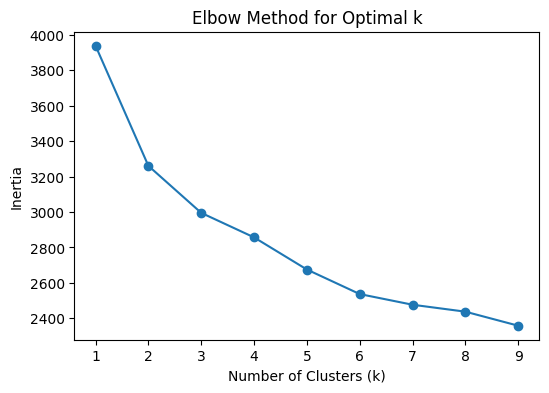

               age       sex        cp    trestbps        chol       fbs  \
Cluster                                                                    
0        58.188679  0.839623  3.764151  135.537736  251.773585  0.198113   
1        48.892562  0.909091  2.760331  127.512397  228.239669  0.123967   
2        58.039474  0.092105  2.947368  132.973684  268.986842  0.118421   

          restecg     thalach     exang   oldpeak     slope        ca  \
Cluster                                                                 
0        1.292453  131.207547  0.679245  1.935849  2.000000  1.264151   
1        0.677686  164.685950  0.123967  0.566942  1.330579  0.314050   
2        1.065789  151.263158  0.157895  0.542105  1.473684  0.381579   

             thal    target  
Cluster                      
0        6.216981  0.905660  
1        4.429752  0.264463  
2        3.105263  0.144737  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


💾 تم حفظ clustered_data.csv في results/


In [3]:
# ===== Step 5: Unsupervised Learning (K-Means) =====
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# تحميل الداتا النظيفة
df = pd.read_csv("/content/heart_disease_clean.csv")
X = df.drop('target', axis=1)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method لتحديد أفضل عدد clusters
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# تدريب KMeans بعد اختيار k المناسب (مثلاً 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
print(df.groupby('Cluster').mean())
import os
os.makedirs("results", exist_ok=True)

df.to_csv("results/clustered_data.csv", index=False)


from google.colab import files
files.download("results/clustered_data.csv")
# حفظ النتيجة في results
df.to_csv("results/clustered_data.csv", index=False)
print("\n💾 تم حفظ clustered_data.csv في results/")

